In [ ]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# retrieve training and testing data

training_data_set = np.genfromtxt("hw05_data_set_train.csv", delimiter = ",")
test_data_set = np.genfromtxt("hw05_data_set_test.csv", delimiter = ",")

training_X = training_data_set[:, 0]
training_y = training_data_set[:, 1]

test_X = test_data_set[:, 0]
test_y = test_data_set[:, 1]

N_train = training_X.shape[0]

In [ ]:
# learning algorithm

def learning_algorithm(P):
  # initialize data structures
  node_indices = {}
  is_terminal = {}
  need_split = {}
  node_features = {}
  node_splits = {}
  node_frequencies = {}

  # put all training instances into the root node
  node_indices[1] = np.array(range(N_train))
  need_split[1] = True
  returned_split_values = []

  while True:
    split_nodes = [key for key, value in need_split.items() if value == True]
    if len(split_nodes) == 0:
      break

    # finding best split for each splitting node
    for split_node in split_nodes:
      data_indices = node_indices[split_node]
      need_split[split_node] = False

      # if length of nodes in split is less than P, stop
      if len(data_indices) > P:
        best_score = 0.0
        best_split = 0.0
        unique_values = np.sort(np.unique(training_X[data_indices]))
        split_positions = (unique_values[1:len(unique_values)] + \
                                    unique_values[0:(len(unique_values) - 1)]) / 2
        split_scores = np.repeat(0.0, len(split_positions))

        # find best split among each split position
        for s in range(len(split_positions)):
          this_split_score = 0
          left_indices = data_indices[training_X[data_indices] > \
                        split_positions[s]]
          right_indices = data_indices[training_X[data_indices] <= \
                          split_positions[s]]

          left_predicted = np.sum(training_y[left_indices]) / len(left_indices)
          right_predicted = np.sum(training_y[right_indices]) / len(right_indices) 
          left_y = training_y[left_indices]
          right_y = training_y[right_indices]
          this_sum = 0

          for i in range(len(left_indices)):
            this_sum += (left_y[i] - left_predicted)**2
          for i in range(len(right_indices)):
            this_sum += (right_y[i] - right_predicted)**2

          this_split_score = this_sum / (len(left_indices) + len(right_indices))
          split_scores[s] = this_split_score

        best_score = np.min(split_scores)
        best_split = split_positions[np.argmin(split_scores)]
        returned_split_values.append(best_split)

        # create left node using the selected split
        left_indices = data_indices[training_X[data_indices] > \
                      best_split]
        node_indices[2 * split_node] = left_indices
        need_split[2 * split_node] = True

        # create right node using the selected split
        right_indices = data_indices[training_X[data_indices] <= \
                      best_split]
        node_indices[2 * split_node + 1] = right_indices
        need_split[2 * split_node + 1] = True
  return returned_split_values

In [ ]:
# get splits and y_predicted results for a pruning parameter 

def get_splits_and_y_predicted(P):
  value = learning_algorithm(P)
  value = np.sort(value)
  y_predicted = []
  old_val = 0
  max_X = 2.0

  # sort total data and retrieve sorted X and Y values
  total_data_sorted = training_data_set[training_data_set[:, 0].argsort()]
  training_X_sorted = total_data_sorted[:, 0]
  training_y_sorted = total_data_sorted[:, 1]

  # for each split boundary, calculate the y_predicted value
  for i in range(len(value) + 1):
    this_split_val = 0
    if i < len(value): 
      this_split_val = value[i]
    else:
      this_split_val = max_X
    temp_X = training_X_sorted[training_X_sorted <= this_split_val]
    range_values = training_y_sorted[training_X_sorted <= this_split_val]
    range_values = range_values[temp_X > old_val]
    sum = np.sum(range_values)
    count = len(range_values)
    this_val = sum / count
    y_predicted.append(this_val)
    old_val = this_split_val

  returned = []
  returned.append(value)
  returned.append(y_predicted)
  return returned

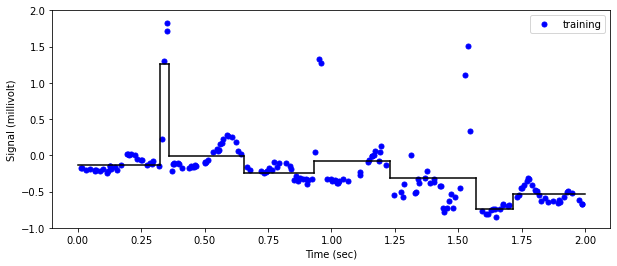

In [ ]:
# print results for when P is 30 for training

returned_val_p_is_30 = get_splits_and_y_predicted(30)
min_value_x = 0.0
max_value_x = 2.0
min_value_y = -1.0

# adjust required data
splits_p_is_30 = [min_value_x]
# retrieve data from the algorithm
splits_p_is_30_pure = returned_val_p_is_30[0]
splits_p_is_30 = np.append(splits_p_is_30, splits_p_is_30_pure)
y_predicted_p_is_30 = returned_val_p_is_30[1]

# set plot parameters
x_axis_num = 9
y_axis_num = 7
x_axis_values = np.asarray([min_value_x + 0.25 * num for num in range(x_axis_num)]).tolist()
y_axis_values = np.asarray([min_value_y + 0.5 * num for num in range(y_axis_num)]).tolist()
plt.figure(figsize = (10, 4))
plt.plot(training_X, training_y, "b.", markersize = 10, label = 'training')
plt.ylabel('Signal (millivolt)')
plt.xlabel('Time (sec)')
plt.legend()

# plot y_predicted results
for b in range(len(y_predicted_p_is_30)):
  if b < len(y_predicted_p_is_30) - 1:
    plt.plot([splits_p_is_30[b], splits_p_is_30[b + 1]], [y_predicted_p_is_30[b], y_predicted_p_is_30[b]], color = 'black')
  else: 
    plt.plot([splits_p_is_30[b], max_value_x], [y_predicted_p_is_30[b], y_predicted_p_is_30[b]], color = 'black')
for b in range(len(splits_p_is_30) - 1):
  plt.plot([splits_p_is_30_pure[b], splits_p_is_30_pure[b]], [y_predicted_p_is_30[b], y_predicted_p_is_30[b + 1]], "k-")

plt.xticks(x_axis_values)
plt.yticks(y_axis_values)
plt.show()

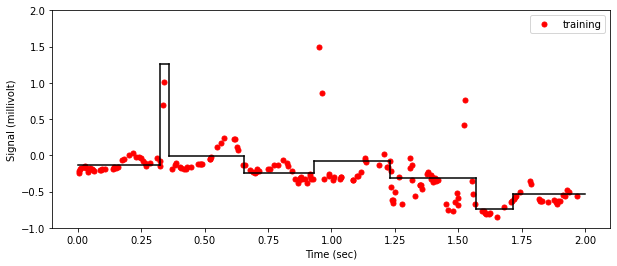

In [ ]:
# print results for when P is 30 for testing

# set plot parameters
x_axis_num = 9
y_axis_num = 7
x_axis_values = np.asarray([min_value_x + 0.25 * num for num in range(x_axis_num)]).tolist()
y_axis_values = np.asarray([min_value_y + 0.5 * num for num in range(y_axis_num)]).tolist()
plt.figure(figsize = (10, 4))
plt.plot(test_X, test_y, "r.", markersize = 10, label = 'training')
plt.ylabel('Signal (millivolt)')
plt.xlabel('Time (sec)')
plt.legend()

# plot y_predicted results
for b in range(len(y_predicted_p_is_30)):
  if b < len(y_predicted_p_is_30) - 1:
    plt.plot([splits_p_is_30[b], splits_p_is_30[b + 1]], [y_predicted_p_is_30[b], y_predicted_p_is_30[b]], color = 'black')
  else: 
    plt.plot([splits_p_is_30[b], max_value_x], [y_predicted_p_is_30[b], y_predicted_p_is_30[b]], color = 'black')
for b in range(len(splits_p_is_30) - 1):
  plt.plot([splits_p_is_30_pure[b], splits_p_is_30_pure[b]], [y_predicted_p_is_30[b], y_predicted_p_is_30[b + 1]], "k-")

plt.xticks(x_axis_values)
plt.yticks(y_axis_values)
plt.show()

In [ ]:
# method for calculating RMSE for inputs P (pruning parameter) and train/test (whichever is asked)

def get_RMSE(P, test_or_train):

  returned_val = get_splits_and_y_predicted(P)

  # adjust required data
  splits_val = [min_value_x]
  # retrieve data from the algorithm
  splits_pure = returned_val[0]
  splits = np.append(splits_val, splits_pure)
  y_predicted_val = returned_val[1]

  # sort data
  total_data_sorted_training = training_data_set[training_data_set[:, 0].argsort()]
  training_X_sorted = total_data_sorted_training[:, 0]
  training_y_sorted = total_data_sorted_training[:, 1]
  total_data_sorted_testing = test_data_set[test_data_set[:, 0].argsort()]
  test_y_sorted = total_data_sorted_testing[:, 1]

  # retrieve necessary data
  splits = np.append(splits, [max_value_x])
  border_counts_testing = [np.sum((splits[b] < test_X) & (test_X <= splits[b + 1])) for b in range(len(splits) - 1)]
  border_counts_training = [np.sum((splits[b] < training_X) & (training_X <= splits[b + 1])) for b in range(len(splits) - 1)]

  # calculate rmse for test
  sum_error_test = 0
  columnLocation = 0
  for i in range(len(y_predicted_val)):
    for n in range(border_counts_testing[i]):
      sum_error_test += (test_y_sorted[columnLocation + n] - y_predicted_val[i])**2
    columnLocation += border_counts_testing[i]
  rmse_regressogram_testing = math.sqrt(sum_error_test / len(test_y_sorted))

  # calculate rmse for training
  sum_error_train = 0
  columnLocation = 0
  for i in range(len(y_predicted_val)):
    for n in range(border_counts_training[i]):
      sum_error_train += (training_y_sorted[columnLocation + n] - y_predicted_val[i])**2
    columnLocation += border_counts_training[i]
  rmse_regressogram_training = math.sqrt(sum_error_train / len(training_y_sorted))

  if test_or_train == "train":
    return rmse_regressogram_training
  return rmse_regressogram_testing

In [ ]:
# calculate RMSE for when P is 30 on training and testing
rmse_train_p_is_30 = get_RMSE(30, "train")
rmse_test_p_is_30 = get_RMSE(30, "test")

print("RMSE on training set is " + str(rmse_train_p_is_30) + " when P is 30")
print("RMSE on test set is " + str(rmse_test_p_is_30) + " when P is 30")

RMSE on training set is 0.2881929342801884 when P is 30
RMSE on test set is 0.22542236010134883 when P is 30


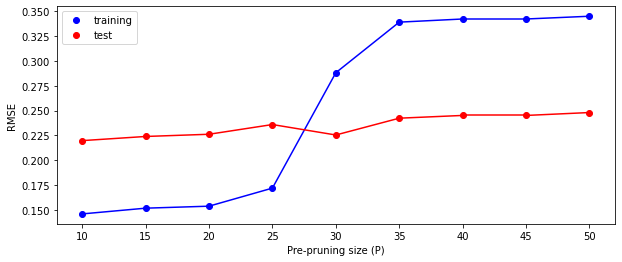

In [ ]:
# calculate RMSE for when P = 10, 15, …, 50 for train and test, plot results

# initialize data structures
rmse_results_train = []
rmse_results_test = []

# set necessary parameters
min_p_value = 10
repeat_val = 9
step_size = 5
p_values = np.asarray([min_p_value + step_size * num for num in range(repeat_val)]).tolist()

# retrieve rmse values for all p values
for p in p_values:
  this_train = get_RMSE(p, "train")
  this_test = get_RMSE(p, "test")
  rmse_results_train = np.append(rmse_results_train, [this_train])
  rmse_results_test = np.append(rmse_results_test, [this_test])

# plot results
plt.figure(figsize = (10, 4))
plt.plot(p_values, rmse_results_train, "b.", markersize = 12, label = 'training')
plt.plot(p_values, rmse_results_test, "r.", markersize = 12, label = 'test')
plt.ylabel('RMSE')
plt.xlabel('Pre-pruning size (P)')
plt.legend()
for b in range(len(rmse_results_train) - 1):
  plt.plot([p_values[b], p_values[b + 1]], [rmse_results_train[b], rmse_results_train[b + 1]], color = 'blue')
for b in range(len(rmse_results_test) - 1):
  plt.plot([p_values[b], p_values[b + 1]], [rmse_results_test[b], rmse_results_test[b + 1]], color = 'red')